In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import tensorflow as tf

Using TensorFlow backend.


In [ ]:
filepath= r'C:\Users\jazeera\Desktop\Bavik\Total_Sales&QTY_2010_2020_Mar.csv'

In [ ]:
spdf=pd.read_csv(filepath)

In [ ]:
spdf.head(20)

,INVOICEDATE,Tot_Line_Amt_Date,Tot_Qty_Date
0,2010-02-01,249114.84,30515.76879
1,2010-03-01,1036142.00,92861.38131
2,2010-04-01,538270.00,63444.33358
3,2010-05-01,1103700.00,116581.47650
4,2010-06-01,1498578.00,159937.85580
5,2010-07-01,1947906.00,223884.94900
6,2010-08-01,264792.00,31276.66946
7,2010-09-01,3424328.00,426495.03700
8,2010-10-01,2644748.00,330732.26070
9,2010-11-01,5907430.00,706422.73220


In [ ]:
# spdf.rename(columns = {'InvoiceDate':'INVOICEDATE','TotalQty':'Tot_Qty_Date','SalesAmount':'Tot_Line_Amt_Date'}, inplace = True) 

In [ ]:
spdf['INVOICEDATE'] = pd.to_datetime(spdf['INVOICEDATE'])
spdf['Tot_Qty_Date'] = spdf['Tot_Qty_Date'].astype(float)
spdf['Tot_Line_Amt_Date'] = spdf['Tot_Line_Amt_Date'].astype(float)

In [ ]:
spdf['Tot_Line_Amt_Date'] = spdf['Tot_Line_Amt_Date'].astype(int)

In [ ]:
spdf=spdf.drop(['Tot_Qty_Date'], axis=1)

In [ ]:
spdf.tail(82)

,INVOICEDATE,Tot_Line_Amt_Date
3563,2019-12-28,3527546
3564,2019-12-29,2778187
3565,2019-12-30,2765363
3566,2019-12-31,2901926
3567,2020-01-03,2975774
...,...,...
3640,2020-03-16,3747189
3641,2020-03-17,3862347
3642,2020-03-18,3833777
3643,2020-03-19,3984948


In [ ]:
Train = spdf

In [ ]:
#selecting the target variables:
train_df = Train.iloc[:, 1:2].values

In [ ]:
# Apply normalization before feeding to LSTM using sklearn:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_df = train_df.reshape(-1,1)

scaler.fit(train_df)
train_df = scaler.transform(train_df)

In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
# Create the data to train our model on:
time_steps = 90
X_train, y_train = create_dataset(train_df, time_steps)

# reshape it [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 90, 1))

print(X_train.shape)

(3555, 90, 1)


In [ ]:
y_train.shape

In [ ]:
# Build the model 
model = Sequential()

model.add(LSTM(units = 100,return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))


model.add(LSTM(units = 100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 100, return_sequences = False))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units = 1))

In [ ]:

# Compiling the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the model to the Training set
history = model.fit(X_train, y_train, epochs = 20, batch_size = 10, validation_split=.30)

In [ ]:
# # save the model to disk
# import pickle
# filename = 'finalized_LSTM_model_Forecasted.sav'
# pickle.dump(model, open(filename, 'wb'))

In [ ]:
# load the model from disk
import pickle
filename = 'finalized_LSTM_model_Forecasted.sav'
loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)

In [ ]:
#Forecast

pred_list = []

# reshape it [samples, time steps, features]
Last_set=train_df[-90:]
batch = np.reshape(Last_set, (1, 90, 1))

for i in range(100):  
    pred = loaded_model.predict(batch)
    pred_list.append(pred[0,0]) 
    pred = pred.reshape(1,1,1) 
    batch = np.concatenate((batch[:,1:,:], pred), axis=1)
    

In [ ]:
pred_list_array=np.array(pred_list)

In [ ]:
pred_list_array=pred_list_array.reshape(-1, 1)

In [ ]:
pred_list_Unscaled = scaler.inverse_transform(pred_list_array)

In [ ]:
pred_list_Unscaled

array([[4068262.8 ],
       [3954619.  ],
       [3797860.  ],
       [3696288.2 ],
       [3394514.5 ],
       [3861837.2 ],
       [ 156538.73],
       [4169209.2 ],
       [3884219.  ],
       [3772330.8 ],
       [3670458.2 ],
       [3082860.  ],
       [3390118.  ],
       [ 339365.72],
       [3859675.  ],
       [3851296.2 ],
       [3909750.5 ],
       [3805315.5 ],
       [3513668.2 ],
       [3543316.8 ],
       [ 248802.94],
       [4115249.2 ],
       [3867098.2 ],
       [3731212.8 ],
       [3503836.5 ],
       [3082540.8 ],
       [3482026.2 ],
       [ 372128.3 ],
       [3956772.8 ],
       [3872655.2 ],
       [3739310.5 ],
       [3620894.5 ],
       [3419577.  ],
       [3573807.2 ],
       [ 193759.66],
       [3983335.  ],
       [3727456.5 ],
       [3587117.8 ],
       [3417119.  ],
       [2924866.5 ],
       [3344770.5 ],
       [ 341308.66],
       [3821696.2 ],
       [3802966.8 ],
       [3751761.  ],
       [3647487.8 ],
       [3385329.5 ],
       [34247

In [ ]:
df_Forecasted = pd.DataFrame(pred_list_Unscaled, columns=['Forecasted'])

In [ ]:
T=pd.Series(pd.date_range('2020-03-21', freq='D', periods=100))

In [ ]:
Future_dates = pd.DataFrame(T, columns=['INVOICEDATE'])

In [ ]:
finaldf = pd.concat([Future_dates, df_Forecasted], axis = 1)

In [ ]:
finaldf.tail(20)

,INVOICEDATE,Forecasted
80,2020-06-09,3.500145e+06
81,2020-06-10,3.111502e+06
82,2020-06-11,3.386584e+06
83,2020-06-12,3.060277e+05
84,2020-06-13,3.902542e+06
85,2020-06-14,3.795715e+06
86,2020-06-15,3.706062e+06
87,2020-06-16,3.568785e+06
88,2020-06-17,3.268280e+06
89,2020-06-18,3.428676e+06


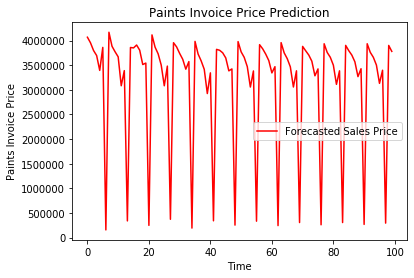

In [ ]:
plt.plot(finaldf['Forecasted'], color = 'red', label = 'Forecasted Sales Price')
plt.title('Paints Invoice Price Prediction')
plt.xlabel('Time')
plt.ylabel('Paints Invoice Price')
plt.legend()
plt.show()